In [1]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.externals import joblib
%matplotlib inline
%load_ext line_profiler

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
lda = joblib.load('LDA_Model.pkl')
catalog = np.loadtxt("/Users/tktakaro/Documents/Type-Iax-HST/images/sn2008ha/sn2008ha.phot.out")

//anaconda/lib/python3.5/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LinearDiscriminantAnalysis from version pre-0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: The file 'LDA_Model.pkl' has been generated with a joblib version less than 0.10. Please regenerate this pickle file.
  if __name__ == '__main__':


In [4]:
# Removes points with nan. It is assumed that these are all magnitude measurements, so they are set to their max.
flat = catalog.flatten()
for i in range(flat.size):
    if (np.isnan(flat[i])) or (not np.isfinite(flat[i])):
        flat[i] = 99.999
        catalog[i//271][i%271] = 99.999
        print(i)

19012
19220
29284
29310
29323
29375
29479
29531
36356
36577
42318
42513
42834
42860
42873
42912
43016
43068
47467
47662
51803
52024
64269
64451
78361
78543
79961
79987
80000
80039
80143
80195
81071
81266
83781
83989
85381
85407
85420
85459
85563
85615
90285
90467
94324
94350
94363
94415
94519
94571
100041
100236
100312
100494
108171
108379
112236
112431
114404
114599
117114
117296
118172
118198
118211
118237
118341
118393
118714
118740
118753
118805
118909
118961
137981
138176
148279
148487
151802
152010
156680
156875
170772
170967
173753
173961
175082
175108
175121
175147
175251
175303
184838
184864
184877
184903
185007
185059
204350
204376
204389
204441
204545
204597
226056
226264
227682
227890
233102
233310
237438
237646
238793
238975
239001
250446
250641
253427
253635
257763
257958
265622
265830
267493
267519
267532
267584
267688
267740
271584
271792
277546
277741
278875
278901
278914
278953
279057
279109
292180
292388
300852
301047
306001
306209
307085
307293
310608
310790
312479


In [5]:
cat_predictions=lda.predict(catalog) # Contains the predicted good/bad points

In [3]:
pos_predict = np.zeros((catalog.shape[0],2))
info_predict = np.zeros(np.shape(catalog))

j = 0 # Iteration variable for positions array
for i in range(catalog.shape[0]): # Cycles through each object in catalog
    # Checks to make sure point is "good"
    # Good defined by: 1. S/N > 3     2. Sharpness < .25     3. Roundness < 1     4. Crowding < .1 
    #                  5. Object type = "Bright Star"     6. ML algorithm picks as good
    if ((catalog[i][5] >= 3)&(abs(catalog[i][6]) < .3)&(abs(catalog[i][7]) < 1)
        &(catalog[i][9] < .1)): # &(cat_predictions[i] == 'green')
        pos_predict[j][0] = catalog[i][2] # Assigns X position
        pos_predict[j][1] = catalog[i][3] # Assigns Y position
        info_predict[j] = catalog[i]
        j = j + 1
                
# Trims all zeros from end of positions array, left from "bad" objects
pos_predict = pos_predict[~np.all(pos_predict == 0, axis=1)]
info_predict = info_predict[~np.all(info_predict == 0, axis=1)]

# Saves high S/N object X,Y positions
np.savetxt("New_Start(2017)/sn2008ha_Prediction.reg", pos_predict, '%5.2f')

# Load in stars in ROI identified by eye as good and create CMDs

In [4]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2008ha_200pc.reg", "r+")

def mysplit(s, delim=None):
    return [x for x in s.split(delim) if x]

text = asci.readlines()
region = np.zeros([28,2])
for i in range(28):
    A = mysplit(text[i+3], ' # ')
    if A[1][-2] == 'w':
        region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
        region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
region = region[~np.all(region == 0, axis=1)]

# Info for each star chosen as real 
infoF3 = np.zeros([region.shape[0],info_predict.shape[1]])

j = 0 # Iteration variable for region array
for i in range(info_predict.shape[0]): # Cycles through each star predicted above
    if (region[j][0] == pos_predict[i][0])&(region[j][1] == pos_predict[i][1]):
        infoF3[j] = info_predict[i]
        j = j + 1
        if j == region.shape[0]: break

In [5]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2008ha_133pc.reg", "r+")

text = asci.readlines()
region = np.zeros([9,2])
for i in range(9):
    A = mysplit(text[i+3], ' # ')
    if A[1][-2] == 'w':
        region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
        region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
region = region[~np.all(region == 0, axis=1)]

infoF2 = np.zeros([region.shape[0], info_predict.shape[1]])

j = 0 # Iteration variable for region array
for i in range(infoF3.shape[0]): # Cycles through each star predicted above
    if np.array_equal(region[j],infoF3[i][2:4]):
        infoF2[j] = infoF3[i]
        j = j + 1
        if j == region.shape[0]: break

In [6]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2008ha_67pc.reg", "r+")

text = asci.readlines()
region = np.zeros([2,2])
for i in range(2):
    A = mysplit(text[i+3], ' # ')
    if A[1][-2] == 'w':
        region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
        region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
region = region[~np.all(region == 0, axis=1)]

infoF1 = np.zeros([region.shape[0], info_predict.shape[1]])

j = 0 # Iteration variable for region array
for i in range(infoF2.shape[0]): # Cycles through each star predicted above
    if np.array_equal(region[j],infoF2[i][2:4]):
        infoF1[j] = infoF2[i]
        j = j + 1
        if j == region.shape[0]: break

[-2, 3, 30, 24]

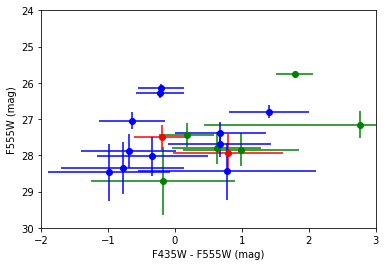

In [7]:
for i in range(infoF3.shape[0]):
    for j in range(infoF2.shape[0]):
        if np.array_equal(infoF3[i],infoF2[j]):
            infoF3[i] = np.zeros(infoF3[i].size)
for i in range(infoF2.shape[0]):
    for j in range(infoF1.shape[0]):
        if np.array_equal(infoF2[i],infoF1[j]):
            infoF2[i] = np.zeros(infoF2[i].size)

infoF2 = infoF2[~np.all(infoF2 == 0, axis=1)]
infoF3 = infoF3[~np.all(infoF3 == 0, axis=1)]
# F555W vs F435W - F555W
F435W_F1 = infoF1[:,15]
xerr_F1 = np.sqrt(infoF1[:,17]**2 + infoF1[:,30]**2)
F555W_F1 = infoF1[:,28]
yerr_F1 = infoF1[:,30]

F435W_F2 = infoF2[:,15]
xerr_F2 = np.sqrt(infoF2[:,17]**2 + infoF2[:,30]**2)
F555W_F2 = infoF2[:,28]
yerr_F2 = infoF2[:,30]

F435W_F3 = infoF3[:,15]
xerr_F3 = np.sqrt(infoF3[:,17]**2 + infoF3[:,30])
F555W_F3 = infoF3[:,28]
yerr_F3 = infoF3[:,30]

line1 = plt.errorbar(F435W_F1 - F555W_F1, F555W_F1, fmt='ro', xerr=xerr_F1, yerr=yerr_F1)
line2 = plt.errorbar(F435W_F2 - F555W_F2, F555W_F2, fmt='go', xerr=xerr_F2, yerr=yerr_F2)
line3 = plt.errorbar(F435W_F3 - F555W_F3, F555W_F3, fmt='bo', xerr=xerr_F3, yerr=yerr_F3)

#plt.plot(F435W_F1 - F555W_F1, F555W_F1, 'ro', F435W_F2 - F555W_F2, F555W_F2, 'go', F435W_F3 - F555W_F3, F555W_F3, 'bo')
plt.gca().invert_yaxis()
plt.xlabel('F435W - F555W (mag)')
plt.ylabel('F555W (mag)')
plt.axis([-2,3,30,24])

[-1, 2, 29, 22]

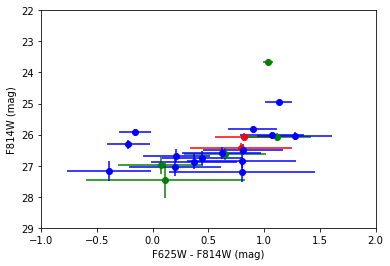

In [8]:
F625W_F1 = infoF1[:,41]
xerr2_F1 = np.sqrt(infoF1[:,43]**2 + infoF1[:,56]**2)
F814W_F1 = infoF1[:,54]
yerr2_F1 = infoF1[:,56]

F625W_F2 = infoF2[:,41]
xerr2_F2 = np.sqrt(infoF2[:,43]**2 + infoF2[:,56]**2)
F814W_F2 = infoF2[:,54]
yerr2_F2 = infoF2[:,56]

F625W_F3 = infoF3[:,41]
xerr2_F3 = np.sqrt(infoF3[:,43]**2 + infoF3[:,56]**2)
F814W_F3 = infoF3[:,54]
yerr2_F3 = infoF3[:,56]

line1 = plt.errorbar(F625W_F1 - F814W_F1, F814W_F1, fmt='ro', xerr=xerr2_F1, yerr=yerr2_F1)
line2 = plt.errorbar(F625W_F2 - F814W_F2, F814W_F2, fmt='go', xerr=xerr2_F2, yerr=yerr2_F2)
line3 = plt.errorbar(F625W_F3 - F814W_F3, F814W_F3, fmt='bo', xerr=xerr2_F3, yerr=yerr2_F3)

#plt.plot(F625W_F1 - F814W_F1, F814W_F1, 'ro', F625W_F2 - F814W_F2, F814W_F2, 'go', F625W_F3 - F814W_F3, F814W_F3, 'bo')
plt.gca().invert_yaxis()
plt.xlabel('F625W - F814W (mag)')
plt.ylabel('F814W (mag)')
plt.axis([-1,2,29,22])

In [9]:
import os
import glob
import matplotlib as mpl

mist_dir = "/Users/tktakaro/Documents/Type-Iax-HST/MIST_v1.0_HST_ACSWF"
# All of this MIST isochrone code comes from Asher

In [10]:
kwargs = {"names": ["EEP", "log10_isochrone_age_yr", "initial_mass", "log_Teff", "log_g",
                    "log_L", "z_surf", "ACS_WFC_F435W", "ACS_WFC_F475W", "ACS_WFC_F502N",
                    "ACS_WFC_F550M", "ACS_WFC_F555W", "ACS_WFC_F606W", "ACS_WFC_F625W", 
                    "ACS_WFC_F658N", "ACS_WFC_F660N", "ACS_WFC_F775W", "ACS_WFC_F814W",
                    "ACS_WFC_F850LP", "ACS_WFC_F892N", "phase"],
         "delim_whitespace": True, "comment": "#"}
isochrones = {}
for filename in glob.glob(mist_dir + "/*.iso.cmd"):
    feh_string = filename.split("/")[-1].split("_")[3] # Pulls metalicity information
    if feh_string[0] == "p":
        feh = float(feh_string[1:]) # feh is [Fe/H]
    elif feh_string[0] == "m":
        feh = -float(feh_string[1:])
    else:
        raise ValueError
    df = pandas.read_csv(filename, **kwargs)
    df['ages'] = 10 ** df.log10_isochrone_age_yr / 1e9
    isochrones[feh] = df # Creates dictionary accessible by entering a particular metalicity

In [11]:
# Reddening, metallicity, and distance errors
dist_lower = 5 * (np.log10(21.81e6 - 1.53e6) - 1)
dist_upper = 5 * (np.log10(21.81e6 + 1.53e6) - 1)
red_lower = 0
red_upper = 0
metal_lower = -0.50
metal_upper = -0.50

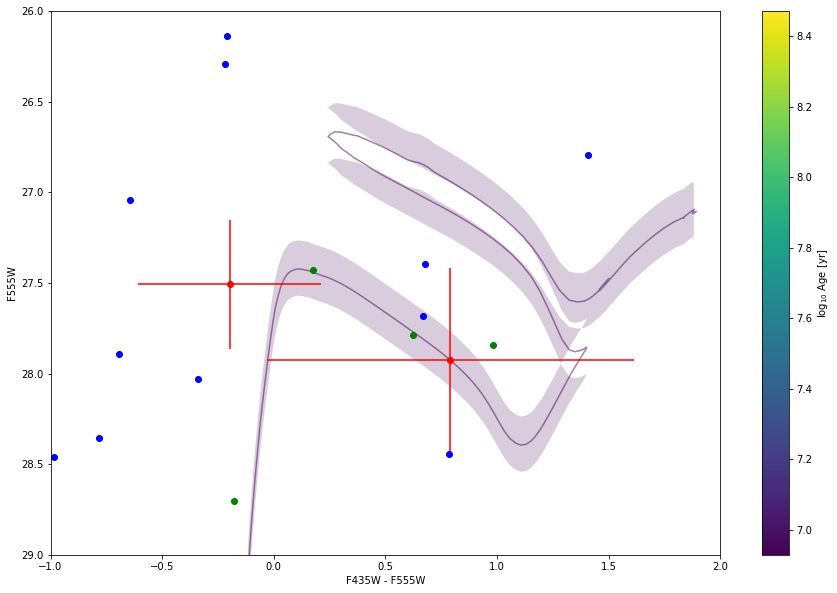

In [12]:
# fix metallicity, vary age
df = isochrones[-0.50]
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()

age_cmd = {}

ages = ages[(ages > 7.7) & (ages < 7.75)]
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Three adjustments: 1. Distance: added to mag 2. MW Extinction: added to both. 3. Galactic extinction
    dist_adjust = 5 * (np.log10(21.81e6) - 1)
    F435W_ext = 0.283 # extinction in F435W in UGC 12682 from NED
    F555W_ext = 0.219 # extinction in F555W in UGC 12682 from NED
    Gal_ext = 0
    # Multiply Gal_ext by A_lambda/E(B-V) values from Schlafly, Finkbeiner 2011
    mag = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext + 2.792*Gal_ext
    mag_lower = df[idx].ACS_WFC_F555W + dist_lower + F555W_ext + 2.792*red_lower
    mag_upper = df[idx].ACS_WFC_F555W + dist_upper + F555W_ext + 2.792*red_upper
    color = df[idx].ACS_WFC_F435W - df[idx].ACS_WFC_F555W  + F435W_ext - F555W_ext + (3.610 - 2.792) * Gal_ext
    age_cmd[age] = (color, mag, mag_lower, mag_upper)

norm = mpl.colors.Normalize(vmin=ages.min(), vmax=ages.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array(ages)
plt.subplots(figsize=(15, 10))
for age, (color, mag, mag_lower, mag_upper) in age_cmd.items():
    plt.plot(color, mag, alpha=0.5, color=sm.to_rgba(age), zorder=0)
    plt.fill_between(color, mag_lower, mag_upper, facecolor=sm.to_rgba(age), alpha=0.2, edgecolor='none')
    #plt.plot(color, mag_lower, 'grey', color, mag_upper, 'grey', alpha=0.3)
    
# Plots stars
line1 = plt.errorbar(F435W_F1 - F555W_F1, F555W_F1, fmt='ro', xerr=xerr_F1, yerr=yerr_F1)
#line2 = plt.errorbar(F435W_F2 - F555W_F2, F555W_F2, fmt='go', xerr=xerr_F2, yerr=yerr_F2)
line2 = plt.plot(F435W_F2 - F555W_F2, F555W_F2, 'go')
#line3 = plt.errorbar(F435W_F3 - F555W_F3, F555W_F3, fmt='bo', xerr=xerr_F3, yerr=yerr_F3)
line3 = plt.plot(F435W_F3 - F555W_F3, F555W_F3, 'bo')
# Plots reddening vector
#plt.arrow(-1, 24.5, (3.610 - 2.792)*Gal_ext, 2.792*Gal_ext, head_width=0.05, head_length=0.1, fc='k', ec='k')

plt.xlabel("F435W - F555W")
plt.ylabel("F555W")
plt.ylim(29,26)
plt.xlim(-1, 2)
cb = plt.colorbar(sm)
cb.set_label('$\log_{10}$ Age [yr]')
plt.draw()
plt.show()

#plt.savefig('sn2008ha_CMD1', dpi=900)

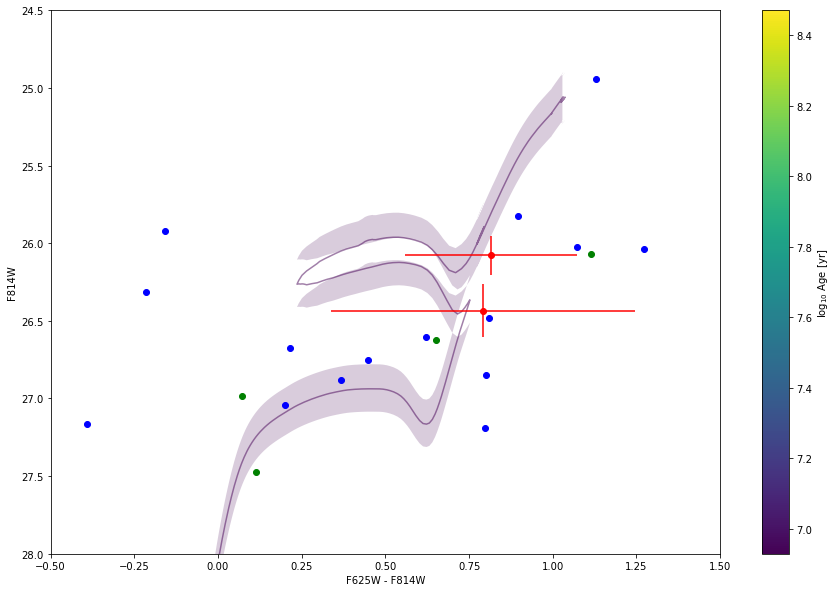

In [13]:
# fix metallicity, vary age
df = isochrones[-0.50]
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()

age_cmd = {}


ages = ages[(ages > 7.7) & (ages < 7.75)]
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Two adjustments: 1. Distance: added to mag 2. Extinction: added to both.
    F625W_ext = 0.174 # extinction in F625W in UGC 12682 from NED
    F814W_ext = 0.120 # extinction in F814W in UGC 12682 from NED
    mag = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*Gal_ext
    mag_lower = df[idx].ACS_WFC_F814W + dist_lower + F814W_ext + 1.526*red_lower
    mag_upper = df[idx].ACS_WFC_F814W + dist_upper + F814W_ext + 1.526*red_upper
    color = df[idx].ACS_WFC_F625W - df[idx].ACS_WFC_F814W + F625W_ext - F814W_ext + (2.219 - 1.526)*Gal_ext
    age_cmd[age] = (color, mag, mag_lower, mag_upper)

norm = mpl.colors.Normalize(vmin=ages.min(), vmax=ages.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array(ages)
plt.subplots(figsize=(15, 10))
for age, (color, mag, mag_lower, mag_upper) in age_cmd.items():
    plt.plot(color, mag, alpha=0.5, color=sm.to_rgba(age), zorder=0)
    plt.fill_between(color, mag_lower, mag_upper, facecolor=sm.to_rgba(age), alpha=0.2, edgecolor='none')
    
# Plots stars
line1 = plt.errorbar(F625W_F1 - F814W_F1, F814W_F1, fmt='ro', xerr=xerr2_F1, yerr=yerr2_F1)
#line2 = plt.errorbar(F625W_F2 - F814W_F2, F814W_F2, fmt='go', xerr=xerr2_F2, yerr=yerr2_F2)
line2 = plt.plot(F625W_F2 - F814W_F2, F814W_F2, 'go')
#line3 = plt.errorbar(F625W_F3 - F814W_F3, F814W_F3, fmt='bo', xerr=xerr2_F3, yerr=yerr2_F3)
line3 = plt.plot(F625W_F3 - F814W_F3, F814W_F3, 'bo')

# Plots reddening vector
plt.arrow(-0.5, 23.5, (2.219 - 1.526)*Gal_ext, 1.526*Gal_ext, head_width=0.05, head_length=0.1, fc='k', ec='k')

plt.xlabel("F625W - F814W")
plt.ylabel("F814W")
plt.ylim(28,24.5)
plt.xlim(-.5, 1.5)
cb = plt.colorbar(sm)
cb.set_label('$\log_{10}$ Age [yr]')

# Removing clusters

In [14]:
# Using IRAF to compute actual concentration index, i.e. photometry at .5 pixels to photometry at 3 pixels
ascii_1 = open("/Users/tktakaro/Documents/Type-Iax-HST/images/sn2008ha/sn2008ha_f625w_lacosmic.fits.mag.1")
ascii_2 = open("/Users/tktakaro/Documents/Type-Iax-HST/images/sn2008ha/sn2008ha_f625w_lacosmic.fits.mag.2")
text_1 = ascii_1.readlines()
text_2 = ascii_2.readlines()

concentration = np.zeros(32)
for i in range(32):
    if mysplit(text_1[5*i + 79])[4] == 'INDEF': # Removes objects with no defined magnitude at .5 pixels
        concentration[i] = 99
    elif mysplit(text_2[5*i + 79])[4] == 'INDEF': # Removes objects with no defined magnitude at 3 pixels
        concentration[i] = -99
    else: concentration[i] = float(mysplit(text_1[5*i + 79])[4]) - float(mysplit(text_2[5*i + 79])[4])
ascii_1.close()
ascii_2.close()

In [15]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2008ha_200pc.reg", "r+")
text = asci.readlines()

region = np.zeros([32,2])
for i in range(32):
    A = mysplit(text[i+3], ' # ')
    region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
    region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]

# Info for each star chosen as real 
info = np.zeros([region.shape[0],info_predict.shape[1]])

j = 0 # Iteration variable for region array
for i in range(info_predict.shape[0]): # Cycles through each star predicted above
    if (region[j][0] == pos_predict[i][0])&(region[j][1] == pos_predict[i][1]):
        info[j] = info_predict[i]
        j = j + 1
        if j == region.shape[0]: break

(30, 24)

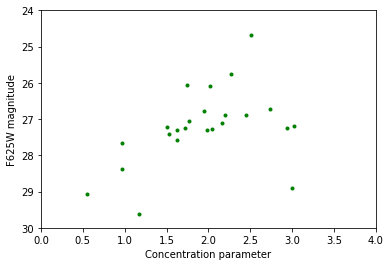

In [16]:
# Plots the concentration parameter vs magnitude
plt.plot(concentration, info[:,41], 'g.')
plt.xlabel('Concentration parameter')
plt.ylabel('F625W magnitude')
plt.xlim(0,4)
plt.ylim(30,24)

In [17]:
# Cut out clusters (identified as objects with concentration parameter < 2.3, from Chandar et. al. 2010)
new_info = np.zeros(info.shape)
for i in range(32):
    if (concentration[i] < 2.3): # & (concentration[i] >= 0):
        new_info[i] = info[i]
new_info = new_info[~np.all(new_info == 0, axis=1)]

In [18]:
np.savetxt("New_Start(2017)/sn2008ha_NoClustersROI.reg", new_info[:,2:4], '%5.2f')

In [19]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2008ha_NoClustersROI_133pc.reg", "r+")
text = asci.readlines()
region = np.zeros([32,2])

for i in range(9):
    region[i][0] = mysplit(text[i])[0]
    region[i][1] = mysplit(text[i])[1]
region = region[~np.all(region == 0, axis=1)]

new_info2 = np.zeros([region.shape[0], new_info.shape[1]])

j = 0 # Iteration variable for region array
for i in range(new_info.shape[0]): # Cycles through each star predicted above
    if (region[j][0] == new_info[i][2])&(region[j][1] == new_info[i][3]):
        new_info2[j] = new_info[i]
        j = j + 1
        if j == region.shape[0]: break

asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2008ha_NoClustersROI_67pc.reg", "r+")
text = asci.readlines()
region = np.zeros([9,2])

for i in range(1):
    region[i][0] = mysplit(text[i])[0]
    region[i][1] = mysplit(text[i])[1]
region = region[~np.all(region == 0, axis=1)]

new_info3 = np.zeros([region.shape[0], new_info.shape[1]])

j = 0 # Iteration variable for region array
for i in range(new_info.shape[0]): # Cycles through each star predicted above
    if (region[j][0] == new_info[i][2])&(region[j][1] == new_info[i][3]):
        new_info3[j] = new_info[i]
        j = j + 1
        if j == region.shape[0]: break
                
                
for i in range(new_info.shape[0]):
    for j in range(new_info2.shape[0]):
        if np.array_equal(new_info[i],new_info2[j]):
            new_info[i] = np.zeros(new_info[i].size)
for i in range(new_info2.shape[0]):
    for j in range(new_info3.shape[0]):
        if np.array_equal(new_info2[i],new_info3[j]):
            new_info2[i] = np.zeros(new_info2[i].size)
            
new_info2 = new_info2[~np.all(new_info2 == 0, axis=1)]
new_info = new_info[~np.all(new_info == 0, axis=1)]

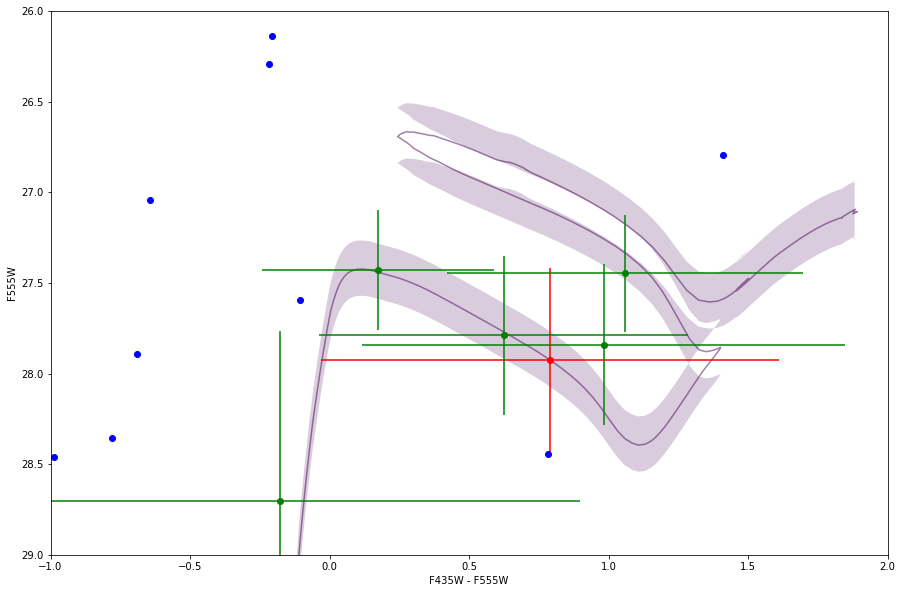

In [20]:
# fix metallicity, vary age
df = isochrones[-0.50]
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()

age_cmd = {}

ages = ages[(ages > 7.65) & (ages < 7.75)]
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Three adjustments: 1. Distance: added to mag 2. MW Extinction: added to both. 3. Galactic extinction
    dist_adjust = 5 * (np.log10(21.81e6) - 1)
    F435W_ext = 0.283 # extinction in F435W in UGC 12682 from NED
    F555W_ext = 0.219 # extinction in F555W in UGC 12682 from NED
    Gal_ext = 0
    # Multiply Gal_ext by A_lambda/E(B-V) values from Schlafly, Finkbeiner 2011
    mag = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext + 2.792*Gal_ext
    mag_lower = df[idx].ACS_WFC_F555W + dist_lower + F555W_ext + 2.792*red_lower
    mag_upper = df[idx].ACS_WFC_F555W + dist_upper + F555W_ext + 2.792*red_upper
    color = df[idx].ACS_WFC_F435W - df[idx].ACS_WFC_F555W  + F435W_ext - F555W_ext + (3.610 - 2.792) * Gal_ext
    age_cmd[age] = (color, mag, mag_lower, mag_upper)
    
norm = mpl.colors.Normalize(vmin=ages.min(), vmax=ages.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array(ages)
plt.subplots(figsize=(15, 10))
for age, (color, mag, mag_lower, mag_upper) in age_cmd.items():
    plt.plot(color, mag, alpha=0.5, color=sm.to_rgba(age), zorder=0)
    plt.fill_between(color, mag_lower, mag_upper, facecolor=sm.to_rgba(age), alpha=0.2, edgecolor='none')
    
# Plots stars
line1 = plt.errorbar(new_info3[:,15] - new_info3[:,28], new_info3[:,28], fmt='ro', 
                     xerr=np.sqrt(new_info3[:,17]**2 + new_info3[:,30]**2), yerr=new_info3[:,30])
line2 = plt.errorbar(new_info2[:,15] - new_info2[:,28], new_info2[:,28], fmt='go', 
                     xerr=np.sqrt(new_info2[:,17]**2 + new_info2[:,30]**2), yerr=new_info2[:,30])
#line2 = plt.plot(new_info2[:,15] - new_info2[:,28], new_info2[:,28], 'go')
#line3 = plt.errorbar(new_info[:,15] - new_info[:,28], new_info[:,28], fmt='bo', 
#                     xerr=np.sqrt(new_info[:,17]**2 + new_info[:,30]**2), yerr=new_info[:,30])
line3 = plt.plot(new_info[:,15] - new_info[:,28], new_info[:,28], 'bo')
#line4 = plt.plot(False_stars[:,2] - False_stars[:,3], False_stars[:,3], 'mp')

plt.xlabel("F435W - F555W")
plt.ylabel("F555W")
plt.ylim(29,26)
plt.xlim(-1, 2)
#cb = plt.colorbar(sm)
cb.set_label('$\log_{10}$ Age [yr]')
plt.draw()
plt.show()

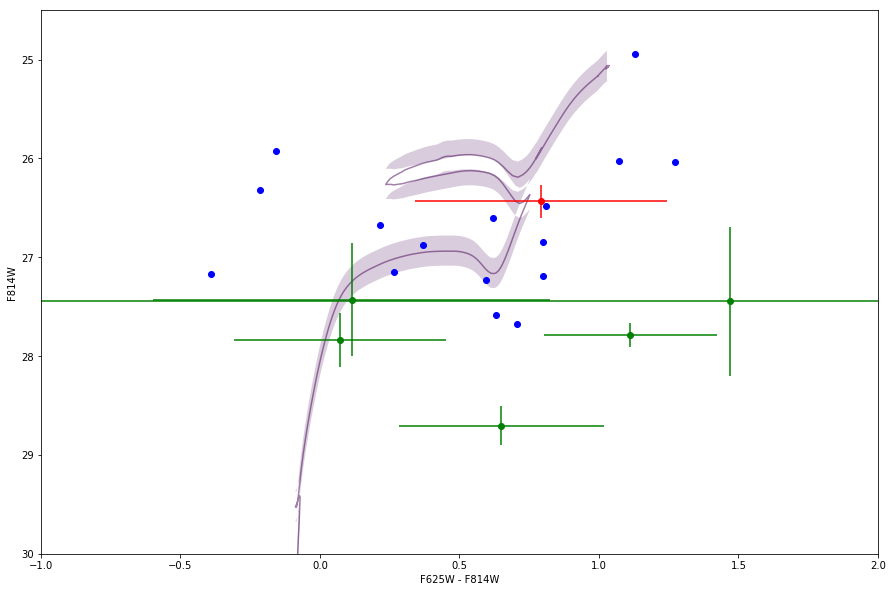

In [21]:
# fix metallicity, vary age
df = isochrones[-0.50]
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()

age_cmd = {}


ages = ages[(ages > 7.65) & (ages < 7.75)]
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Two adjustments: 1. Distance: added to mag 2. Extinction: added to both.
    F625W_ext = 0.174 # extinction in F625W in UGC 12682 from NED
    F814W_ext = 0.120 # extinction in F814W in UGC 12682 from NED
    mag = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*Gal_ext
    mag_lower = df[idx].ACS_WFC_F814W + dist_lower + F814W_ext + 1.526*red_lower
    mag_upper = df[idx].ACS_WFC_F814W + dist_upper + F814W_ext + 1.526*red_upper
    color = df[idx].ACS_WFC_F625W - df[idx].ACS_WFC_F814W + F625W_ext - F814W_ext + (2.219 - 1.526)*Gal_ext
    age_cmd[age] = (color, mag, mag_lower, mag_upper)

norm = mpl.colors.Normalize(vmin=ages.min(), vmax=ages.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array(ages)
plt.subplots(figsize=(15, 10))
for age, (color, mag, mag_lower, mag_upper) in age_cmd.items():
    plt.plot(color, mag, alpha=0.5, color=sm.to_rgba(age), zorder=0)
    plt.fill_between(color, mag_lower, mag_upper, facecolor=sm.to_rgba(age), alpha=0.2, edgecolor='none')
    
# Plots stars
line1 = plt.errorbar(new_info3[:,41] - new_info3[:,54], new_info3[:,54], fmt='ro', 
                     xerr=np.sqrt(new_info3[:,43]**2 + new_info3[:,56]**2), yerr=new_info3[:,56])
line2 = plt.errorbar(new_info2[:,41] - new_info2[:,54], new_info2[:,28], fmt='go', 
                     xerr=np.sqrt(new_info2[:,43]**2 + new_info2[:,56]**2), yerr=new_info2[:,56])
#line2 = plt.plot(new_info2[:,41] - new_info2[:,54], new_info2[:,54], 'go')
#line3 = plt.errorbar(new_info[:,41] - new_info[:,54], new_info[:,28], fmt='bo', 
#                     xerr=np.sqrt(new_info[:,43]**2 + new_info[:,56]**2), yerr=new_info[:,56])
line3 = plt.plot(new_info[:,41] - new_info[:,54], new_info[:,54], 'bo')
#line4 = plt.plot(False_stars[:,4] - False_stars[:,5], False_stars[:,5], 'mp')


plt.xlabel("F625W - F814W")
plt.ylabel("F814W")
plt.ylim(30,24.5)
plt.xlim(-1, 2)
#cb = plt.colorbar(sm)
cb.set_label('$\log_{10}$ Age [yr]')

# Crappy Chi-squared Test

First, we weight stars in the Crappy Chi-squared by assuming a characteristic velocity dispersion for an open cluster and using it to get a radial probability distribution (i.e. probability of stars at some physical distance from the SN position of being coincident in age with SN progenitor).

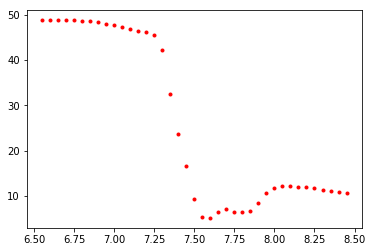

In [24]:
# Reruns through the isochrones the user specifies to get mags, colors, etc.
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()
ages = ages[(ages > 6.5) & (ages < 8.5)]

for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    mag_435 = df[idx].ACS_WFC_F435W + dist_adjust + F435W_ext + 3.610*Gal_ext
    mag_555 = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext + 2.792*Gal_ext
    mag_625 = df[idx].ACS_WFC_F625W + dist_adjust + F625W_ext + 2.219*Gal_ext
    mag_814 = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*Gal_ext
    age_cmd[age] = (mag_435, mag_555, mag_625, mag_814) #(color, mag, mag_lower, mag_upper)
n_ages = i + 1


SN_pos = np.array([1720.34, 3177.13])

CChi = np.zeros([2,n_ages]) # This is the array which measure crappy chi-squared across all filters
k = 0
for age, (mag_435, mag_555, mag_625, mag_814) in age_cmd.items():
    phys_dist_temp = 0 # This will hold the total physical distance weights to be averaged and divided out to normalize
    temp = 0 # This will hold the distance for each data point to the line
    
    # Sets the radial dispersion for the region
    sigma = .92 * 10**age * 3.15e7 * (360 * 60 * 60)/(2 * np.pi) * 1/(21.81e6 * 3.086e13 * .05) # Replace 10000000 w/ 10**age
    for j in range(new_info3.shape[0]):
        # Removes "stars" with mag > 90 in any band
        if (new_info3[j,15] > 90) or (new_info3[j,28] > 90) or (new_info3[j,41] > 90) or (new_info3[j,54] > 90):
            break
            
        # Uses physical distance between star and SN position to weight each star
        phys_dist = np.sqrt((SN_pos[0] - new_info3[j,2])**2 + (SN_pos[1] - new_info3[j,3])**2)
        phys_dist_weight = 2 * 1/(np.sqrt(2 * np.pi) * sigma) * np.exp(- phys_dist**2/(2 * sigma**2)) # Gaussian in radius
        phys_dist_temp += phys_dist_weight
        
        # Adds the difference in mags for each data point in quadrature.
        temp = temp + (phys_dist_weight * np.amin(np.sqrt((new_info3[j,15] - mag_435)**2
          + (new_info3[j,28] - mag_555)**2 + (new_info3[j,41] - mag_625)**2 + (new_info3[j,54] - mag_814)**2)))**2
    for j in range(new_info2.shape[0]):
        # Removes "stars" with mag > 90 in any band
        if (new_info2[j,15] > 90) or (new_info2[j,28] > 90) or (new_info2[j,41] > 90) or (new_info2[j,54] > 90):
            break
        
        # Uses physical distance between star and SN position to weight each star
        phys_dist = np.sqrt((SN_pos[0] - new_info2[j,2])**2 + (SN_pos[1] - new_info2[j,3])**2)
        phys_dist_weight = 2 * 1/(np.sqrt(2 * np.pi) * sigma) * np.exp(- phys_dist**2/(2 * sigma**2)) # Gaussian in radius
        phys_dist_temp += phys_dist_weight
        
        # Adds the difference in mags for each data point in quadrature.
        temp = temp + (phys_dist_weight * np.amin(np.sqrt((new_info2[j,15] - mag_435)**2
          + (new_info2[j,28] - mag_555)**2 + (new_info2[j,41] - mag_625)**2 + (new_info2[j,54] - mag_814)**2)))**2
    for j in range(new_info.shape[0]):
        # Removes "stars" with mag > 90 in any band
        if (new_info[j,15] > 90) or (new_info[j,28] > 90) or (new_info[j,41] > 90) or (new_info[j,54] > 90):
            break
        
        # Uses physical distance between star and SN position to weight each star
        phys_dist = np.sqrt((SN_pos[0] - new_info[j,2])**2 + (SN_pos[1] - new_info[j,3])**2)
        phys_dist_weight = 2 * 1/(np.sqrt(2 * np.pi) * sigma) * np.exp(- phys_dist**2/(2 * sigma**2)) # Gaussian in radius
        phys_dist_temp += phys_dist_weight
        
        # Adds the difference in mags for each data point in quadrature.
        temp = temp + (phys_dist_weight * np.amin(np.sqrt((new_info[j,15] - mag_435)**2
          + (new_info[j,28] - mag_555)**2 + (new_info[j,41] - mag_625)**2 + (new_info[j,54] - mag_814)**2)))**2
    
    # There are two stars removed not counted, as they have >90 mag in some filter
    phys_dist_temp /= (new_info3.shape[0] + new_info2.shape[0] + new_info.shape[0] - 2)
    CChi[0,k] = age
    CChi[1,k] = np.sqrt(temp)/phys_dist_temp
    k = k + 1
    
# Ensures that the crappy chi-squared arrays are ordered by age for convenience.
CChi = CChi.T[CChi.T[:,0].argsort()]
plt.plot(CChi.T[0], CChi.T[1], 'r.')

Now, we Monte Carlo false stars by sampling the IMF and radial distributions, and using the Isochrones to get false Crappy Chi-squared statistics.

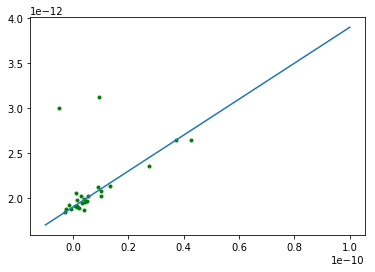

In [25]:
# Testing to find relationship between flux and flux error
plt.plot(new_info3[:,13], new_info3[:,14], 'g.', new_info2[:,13], new_info2[:,14], 'g.', new_info[:,13], new_info[:,14], 'g.')
x_array=np.linspace(-1e-11, 1e-10, num=100)
#plt.xlim(-1e-11,5e-11)
#plt.ylim(1.8e-12,3.2e-12)
plt.plot(x_array, 1.9e-12 + .02*x_array)

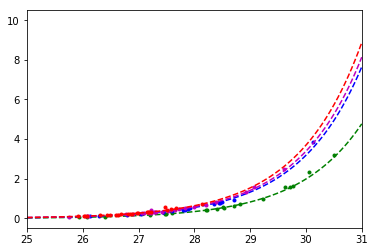

In [26]:
# Testing to find relationship between magnitude and magnitude error (in F435W)
plt.plot(new_info3[:,15], new_info3[:,17], 'g.', new_info2[:,15], new_info2[:,17], 'g.', new_info[:,15], new_info[:,17], 'g.')
plt.xlim(25,31);

# Fit by eye, as the scipy.optimize.curve_fit didn't work
x_array = np.linspace(25, 31, 100)
plt.plot(x_array, 7.8e-12 * 2.4**x_array, 'g--')

# Now test F555W
plt.plot(new_info3[:,28], new_info3[:,30], 'b.', new_info2[:,28], new_info2[:,30], 'b.', new_info[:,28], new_info[:,30], 'b.')
plt.plot(x_array, 1.25e-11 * 2.4**x_array, 'b--')

# Now test F625W
plt.plot(new_info3[:,41], new_info3[:,43], 'm.', new_info2[:,41], new_info2[:,43], 'm.', new_info[:,41], new_info[:,43], 'm.')
plt.plot(x_array, 1.33e-11 * 2.4**x_array, 'm--')

# Now test F814W
plt.plot(new_info3[:,54], new_info3[:,56], 'r.', new_info2[:,54], new_info2[:,56], 'r.', new_info[:,54], new_info[:,56], 'r.')
plt.plot(x_array, 1.45e-11 * 2.4**x_array, 'r--')

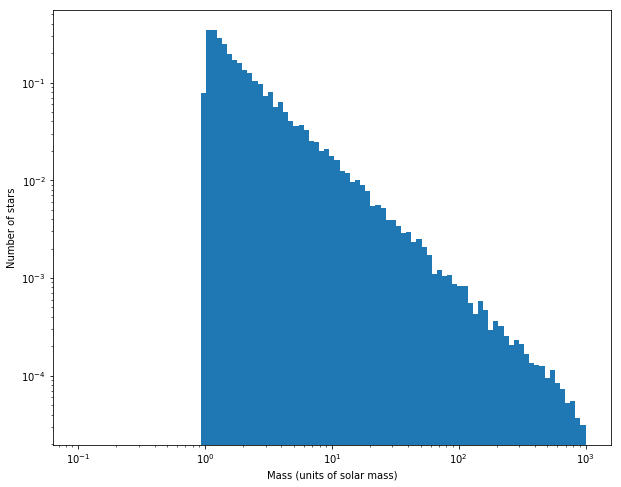

In [27]:
# Setup Kroupa IMF for mass distribution
import scipy.integrate as integrate  
def kroupa(m):
    norm = 0.32705769605379353 # integrated kroupa pdf from .075 to 100
    def pdf1(m): return m**(-.3)/norm
    def pdf2(m): return .08 * m**(-1.3)/norm
    def pdf3(m): return .5 * .08 * m**(-2.3)/norm
    if m < .08:      
        return integrate.quad(pdf1, .075, m)[0]
    elif m < .5:
        return integrate.quad(pdf1, .075, .08)[0] + integrate.quad(pdf2, .08, m)[0]
    else:
        return integrate.quad(pdf1, .075, .08)[0] + integrate.quad(pdf2, .08, .5)[0] + integrate.quad(pdf3, .5, m)[0]
def invertedKroupa(u): # This inverts the CDF, not the PDF
    if u > kroupa(.08):
        return u**(-10/3)
    elif u > kroupa(.5):
        return (2/25)**(1/13) * u**(-10/13)
    else:
        return 5**(-20/23) * u**(-10/23)
    
masses=np.zeros(10000)
for i in range(10000):
    m = invertedKroupa(np.random.random())
    while m < .075: # Only uses stars with mass > .075 solar mass
        m = invertedKroupa(np.random.random())
    masses[i] = m
    
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111)
histogram = ax.hist(masses, bins=np.logspace(np.log10(0.1), np.log10(1000), 100), log=True, normed=True)
fig.gca().set_xscale("log")
plt.xlabel('Mass (units of solar mass)')
plt.ylabel('Number of stars')
plt.show()

In [28]:
# For now, setup Salpeter IMF, because it's less likely to fail.
def SalpeterUnNorm(m):
    return m**-2.35
def SalpeterPDF(m):
    norm = integrate.quad(SalpeterUnNorm, .075, 100)[0]
    return 1/norm * m**-2.35
def SalpeterCDF(m):
    norm = integrate.quad(SalpeterUnNorm, .075, 100)[0]
    return -1/(1.35 * norm) * (m**(-1.35) - .075**(-1.35))
def invSalpeter(u, lower, upper):
    norm = integrate.quad(SalpeterUnNorm, lower, upper)[0] # To go back to how it was, replace the 6's with .075's
    return (lower**(-1.35) - 1.35 * norm * u)**(-1/1.35)

In [65]:
# This section sets up the false stars for one age
age = CChi.T[0][23] # Sorted list of ages is CChi.T[0]
CChi_false = np.zeros([2,1]) # Change 1 to number of runs in Monte Carlo

def Random_mass_mag(mass, mag4, mag5, mag6, mag8):
    m = invSalpeter(np.random.random(), 4, np.amax(mass))
        
    # Determines the magnitude corresponding to the point on the isochrone closest in mass to the chosen mass
    loc=np.array([mag4[np.argmin(np.abs(m - mass))], mag5[np.argmin(np.abs(m - mass))], 
                      mag6[np.argmin(np.abs(m - mass))], mag8[np.argmin(np.abs(m - mass))]])
    scale=np.array([7.8e-12 * 2.4**loc[0], 1.25e-11 * 2.4**loc[1], 1.33e-11 * 2.4**loc[2], 1.45e-11 * 2.4**loc[3]])
    #np.random.seed()
    mags = np.random.normal(loc=loc, scale=scale, size=4)
    return np.array([m, mags[0], mags[1], mags[2], mags[3]])

def False_Stars_CChi(reddening, age):
    dist = np.random.normal(loc=21.81e6, scale=1.53e6) # Chooses distance using gaussian with errors from literature
    dist_adjust = 5 * (np.log10(dist) - 1) # Converts distance to a magnitude adjustment

    temp = 0 # This will hold the distance for each data point to the line

    # This array will hold 1. Mass 2. Radial distance 3-6. Magnitudes
    False_stars = np.zeros([new_info3.shape[0] + new_info2.shape[0] + new_info.shape[0] - 2, 6])

    phys_dist_temp = 0
    for x in range(False_stars.shape[0]):
        idx = df.log10_isochrone_age_yr == age
        mass = df[idx].initial_mass
        mag_435 = df[idx].ACS_WFC_F435W + dist_adjust + F435W_ext + 3.610*reddening
        mag_555 = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext + 2.792*reddening
        mag_625 = df[idx].ACS_WFC_F625W + dist_adjust + F625W_ext + 2.219*reddening
        mag_814 = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*reddening
    
        False_stars[x,1], False_stars[x,2], False_stars[x,3], False_stars[x,4], False_stars[x,5] = Random_mass_mag(
            mass, mag_435, mag_555, mag_625, mag_814)
        
        while (False_stars[x,2] > 30) or (False_stars[x,3] > 30) or (False_stars[x,4] > 30) or (False_stars[x,5] > 30):
            False_stars[x,1], False_stars[x,2], False_stars[x,3], False_stars[x,4], False_stars[x,5] = Random_mass_mag(
                mass, mag_435, mag_555, mag_625, mag_814)
    
        # Samples radial distribution to get radial distance from SN
        sigma = .92 * 10**age * 3.15e7 * (360 * 60 * 60)/(2 * np.pi) * 1/(21.81e6 * 3.086e13 * .05)
        # Adds in inherent spread in star position at formation with the 100 * rand.rand()
        False_stars[x,1] = abs(np.random.normal(loc=0, scale=sigma)) + 100 * np.random.random()
    
        # Now, determine Crappy Chi-squared fit
        phys_dist_weight = 2 * 1/(np.sqrt(2 * np.pi) * sigma) * np.exp(- False_stars[x,1]**2/(2 * sigma**2)) # Gaussian in radius
        phys_dist_temp += phys_dist_weight # Will be used to compute average of the weights
        # Adds the distance for each data point in quadrature.
        temp = temp + (phys_dist_weight * np.amin(np.sqrt((False_stars[x,2] - mag_435)**2
          + (False_stars[x,3] - mag_555)**2 + (False_stars[x,4] - mag_625)**2 + (False_stars[x,5] - mag_814)**2)))**2
    phys_dist_temp /= False_stars.shape[0]
    return np.sqrt(temp)/phys_dist_temp

idx = df.log10_isochrone_age_yr == age
mass = df[idx].initial_mass
mag_435 = df[idx].ACS_WFC_F435W + dist_adjust + F435W_ext
mag_555 = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext
mag_625 = df[idx].ACS_WFC_F625W + dist_adjust + F625W_ext
mag_814 = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext

#%lprun -f Random_mass_mag Random_mass_mag(mass, mag_435, mag_555, mag_625, mag_814)
#%lprun -f False_Stars_CChi False_Stars_CChi(age, 0)
CChi_false[0,0] = age
CChi_false[1,0] = False_Stars_CChi(0, age)
print(CChi_false)

[[  7.7       ]
 [ 65.32245399]]


//anaconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
//anaconda/lib/python3.5/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


7.7 0.0333910603264


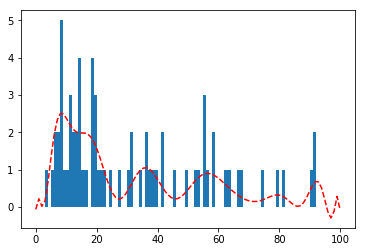

In [91]:
# Now, try with a loop to get characterestic values for CChi
# This was run externally, and saved the output as CChi_false_age7.7npy
CChi_false = np.load("CChi_false_age7.7.npy")

# Finally, fit a probability distribution to the histogram of CChi_false values

x = np.linspace(0,100,100)
y = plt.hist(CChi_false[1,0,:], bins=np.linspace(0,100,101))[0]
p = np.poly1d(np.polyfit(x,y,20)) # Applies a 20th order polynomial fit to the histogram
plt.plot(x, p(x), 'r--')

norm = integrate.quad(p, 0, 100)[0]
print(CChi[23,0], p(CChi[23,1])/norm) # Returns the relative probability of this age being the proper fit

In [119]:
# This cell with do the same as above, but for each age between 6.5 and 8.5

ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()
ages = ages[(ages >= 6.5) & (ages <= 8.5)]

for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    mag_435 = df[idx].ACS_WFC_F435W + dist_adjust + F435W_ext + 3.610*Gal_ext
    mag_555 = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext + 2.792*Gal_ext
    mag_625 = df[idx].ACS_WFC_F625W + dist_adjust + F625W_ext + 2.219*Gal_ext
    mag_814 = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*Gal_ext
    age_cmd[age] = (mag_435, mag_555, mag_625, mag_814)
n_ages = i + 1

CChi_false = np.zeros([2, n_ages, 1000])
j = 0
for age, (mag_435, mag_555, mag_625, mag_814) in age_cmd.items():
    CChi_false[0,j,:] = age
    for i in range(CChi_false.shape[2]):
        CChi_false[1,j,i] = False_Stars_CChi(age,0)
    j += 1

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:54: RuntimeWarning: invalid value encountered in double_scalars


KeyboardInterrupt: 

# Below is deprecated, from using distance bins

In [ ]:
# This is a test of Andy's crappy chi-squared test to inform age selection

# Reruns through the isochrones the user specifies to get mags, colors, etc.
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()
ages = ages[(ages > 6.5) & (ages < 8.5)]

for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    mag = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext + 2.792*Gal_ext
    mag_lower = df[idx].ACS_WFC_F555W + dist_lower + F555W_ext + 2.792*red_lower
    mag_upper = df[idx].ACS_WFC_F555W + dist_upper + F555W_ext + 2.792*red_upper
    color = df[idx].ACS_WFC_F435W - df[idx].ACS_WFC_F555W  + F435W_ext - F555W_ext + (3.610 - 2.792) * Gal_ext
    age_cmd[age] = (color, mag, mag_lower, mag_upper)
n_ages = i + 1


SN_pos = np.array([1720.34, 3177.13])

CChi3_45 = np.zeros([2,n_ages]) # These are the arrays which measure crappy chi-squared for 435 and 555
CChi2_45 = np.zeros([2,n_ages]) # The first column is age, the second ~chi
k = 0
for age, (color, mag, mag_lower, mag_upper) in age_cmd.items():
    temp3 = 0 # These will hold the distance for each data point to the line
    temp2 = 0
    for j in range(new_info3.shape[0]):
        if (new_info3[j,15] > 90) or (new_info3[j,28] > 90):
            break
        # Adds the distance for each data point in quadrature.
        temp3 = temp3 + np.amin(np.sqrt((new_info3[j,15] - new_info3[j,28] - color)**2 + (new_info3[j,28] - mag)**2))**2
    CChi3_45[0,k] = age
    CChi3_45[1,k] = np.sqrt(temp3)
    
    for j in range(new_info2.shape[0]):
        if (new_info2[j,15] > 90) or (new_info2[j,28] > 90):
            break
        # Adds the distance for each data point in quadrature.
        temp2 = temp2 + np.amin(np.sqrt((new_info2[j,15] - new_info2[j,28] - color)**2 
                                        + (new_info2[j,28] - mag)**2))**2
    CChi2_45[0,k] = age
    CChi2_45[1,k] = np.sqrt(temp2)
    k = k + 1
    
# Ensures that the crappy chi-squared arrays are ordered by age for convenience.
CChi3_45 = CChi3_45.T[CChi3_45.T[:,0].argsort()]
CChi2_45 = CChi2_45.T[CChi2_45.T[:,0].argsort()]
plt.plot(CChi3_45.T[0], CChi3_45.T[1], 'r.', CChi2_45.T[0], CChi2_45.T[1], 'g.')

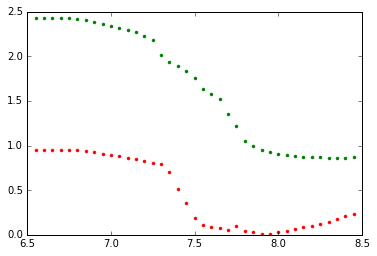

In [263]:
# This is a test of Andy's crappy chi-squared test to inform age selection

# Reruns through the isochrones the user specifies to get mags, colors, etc.
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()
ages = ages[(ages > 6.5) & (ages < 8.5)]

for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    mag = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*Gal_ext
    mag_lower = df[idx].ACS_WFC_F814W + dist_lower + F814W_ext + 1.526*red_lower
    mag_upper = df[idx].ACS_WFC_F814W + dist_upper + F814W_ext + 1.526*red_upper
    color = df[idx].ACS_WFC_F625W - df[idx].ACS_WFC_F814W + F625W_ext - F814W_ext + (2.219 - 1.526)*Gal_ext
    age_cmd[age] = (color, mag, mag_lower, mag_upper)
n_ages = i + 1


CChi3_68 = np.zeros([2,n_ages]) # These are the arrays which measure crappy chi-squared for 625 and 814
CChi2_68 = np.zeros([2,n_ages]) # The first column is age, the second ~chi
k = 0
for age, (color, mag, mag_lower, mag_upper) in age_cmd.items():
    temp3 = 0 # These will hold the distance for each data point to the line
    temp2 = 0
    for j in range(new_info3.shape[0]):
        if (new_info3[j,41] > 90) or (new_info3[j,54] > 90):
            break
        # Adds the distance for each data point in quadrature.
        temp3 = temp3 + np.amin(np.sqrt((new_info3[j,41] - new_info3[j,54] - color)**2 + (new_info3[j,54] - mag)**2))**2
    CChi3_68[0,k] = age
    CChi3_68[1,k] = np.sqrt(temp3)
    
    for j in range(new_info2.shape[0]):
        if (new_info2[j,41] > 90) or (new_info2[j,54] > 90):
            break
        # Adds the distance for each data point in quadrature.
        temp2 = temp2 + np.amin(np.sqrt((new_info2[j,41] - new_info2[j,54] - color)**2 + (new_info2[j,54] - mag)**2))**2
    CChi2_68[0,k] = age
    CChi2_68[1,k] = np.sqrt(temp2)
    k = k + 1
    
# Ensures that the crappy chi-squared arrays are ordered by age for convenience.
CChi3_68 = CChi3_68.T[CChi3_68.T[:,0].argsort()]
CChi2_68 = CChi2_68.T[CChi2_68.T[:,0].argsort()]
plt.plot(CChi3_68.T[0], CChi3_68.T[1], 'r.', CChi2_68.T[0], CChi2_68.T[1], 'g.')

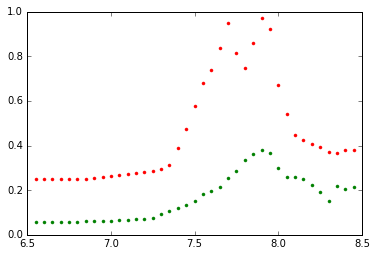

In [273]:
# Attempting to add the information from each CMD in a useful way

CChi3 = np.zeros(CChi3_45.shape)
CChi3[:,0] = CChi3_45[:,0]
for i in range(CChi3_45.shape[0]):
    CChi3[i,1] = np.sqrt(CChi3_45[i,1]**2 + CChi3_68[i,1]**2)
    
CChi2 = np.zeros(CChi2_45.shape)
CChi2[:,0] = CChi2_45[:,0]
for i in range(CChi2_45.shape[0]):
    CChi2[i,1] = np.sqrt(CChi2_45[i,1]**2 + CChi2_68[i,1]**2)

plt.plot(CChi3[:,0], np.exp(-CChi3[:,1]), 'r.', CChi2[:,0], np.exp(-CChi2[:,1]), 'g.')